In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt   
import seaborn as sns

In [3]:
train_df = pd.read_csv('./data/train.csv',index_col='PassengerId')


In [4]:
train_df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Notes
- SibSp: of sublings/ spouses aboard the Titanic
- Parch: # of parents / children aboard the Titanic
- Tickets: ticket number 
- cabin: Cabin number

In [5]:
#Preview Data
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [7]:
test_df = pd.read_csv('./data/test.csv',index_col="PassengerId")


In [8]:
test_df.columns 

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

In [9]:
test_df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [10]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


categorical: survived, sex, embarked, Pclass(ordinal), sibsp, parch


In [11]:
train_df['Survived'] = train_df['Survived'].astype('category')

In [12]:
train_df['Survived'].dtype

CategoricalDtype(categories=[0, 1], ordered=False)

In [13]:
features = ['Pclass', 'Sex', 'SibSp','Parch','Embarked']
def convert_cat(df, features):
    for feature in features:
        df[feature] = df[feature].astype("category")
convert_cat(train_df, features)
convert_cat(test_df, features)


Distribution of Categorical Features

In [14]:
train_df.describe(include=['category'])

,Survived,Pclass,Sex,SibSp,Parch,Embarked
count,891,891,891,891,891,889
unique,2,3,2,7,7,3
top,0,3,male,0,0,S
freq,549,491,577,608,678,644


## 3. Exploratory Data Analysis (EDA)

### 3.1. Correlating categorical 
- categorical: Survived, Sex, Embarked, Pclass, SibSp, Parch

Target variable: Survived


In [15]:
# Target variable is Survived
train_df['Survived'].value_counts().to_frame()

,Survived
0,549
1,342


In [16]:
train_df['Survived'].value_counts(normalize=True).to_frame()


,Survived
0,0.616162
1,0.383838


In [17]:
train_df['Sex'].value_counts().to_frame()


,Sex
male,577
female,314


In [18]:
train_df['Sex'].value_counts(normalize=True).to_frame()


,Sex
male,0.647587
female,0.352413


<Axes: xlabel='Sex', ylabel='count'>

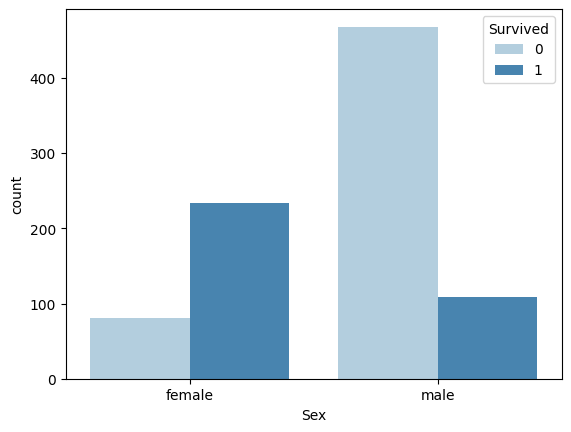

In [19]:
sns.countplot(data=train_df,x='Sex',hue='Survived',palette="Blues")

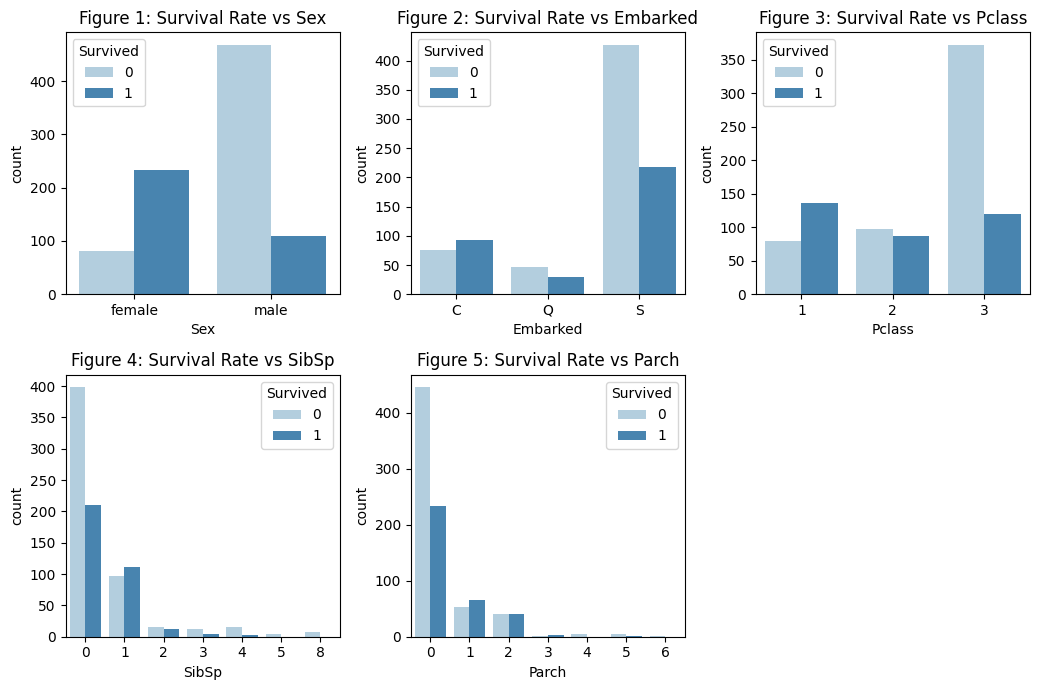

In [20]:
cols = ["Sex", "Embarked", "Pclass", "SibSp","Parch"] 
n_rows = 2
n_cols = 3
fig, ax = plt.subplots(n_rows , n_cols, figsize= (n_cols * 3.5 , n_rows *3.5))

for r in range(0, n_rows):
    for c in range(0, n_cols):  
        i = r*n_cols + c 
        if i < len(cols):
            ax_i = ax[r,c]
            sns.countplot(data= train_df, x=cols[i], hue="Survived",palette= "Blues", ax= ax_i)
            ax_i.set_title(f"Figure {i+1}: Survival Rate vs {cols[i]}")
ax.flat[-1].set_visible(False)
plt.tight_layout()
plt.show()

Observation:

- Survival Rate:
  + Fig1: female survival rate > male survival rate
  + fig2: most people embarked on Southampton, and also had the highest people not survived
  + fig3: 1st class higher survival rate
  + fig4: people going with 0  **SibSp** are mostly not survived

### **3.2. EDA for Numerical Features**
 - numberical features: (continuous) **Age** , **Fare**

<Axes: xlabel='Age', ylabel='Count'>

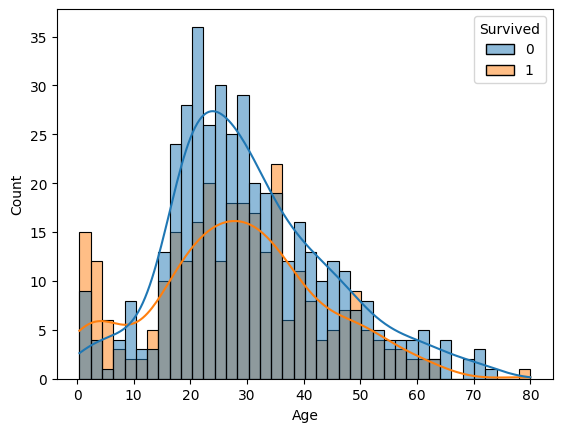

In [21]:
sns.histplot(data= train_df, x='Age', hue='Survived' ,bins = 40,kde=True)

In [22]:
train_df.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<Axes: xlabel='Fare', ylabel='Count'>

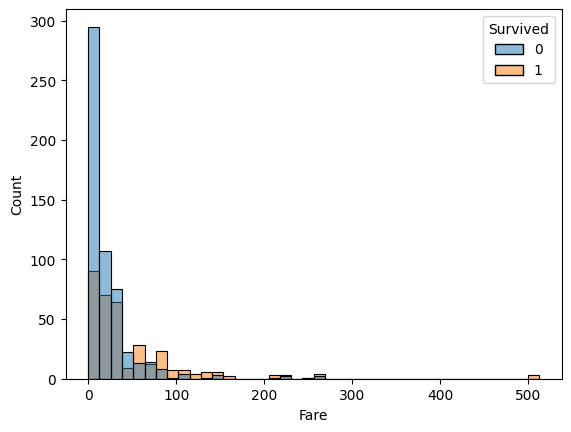

In [25]:
sns.histplot(data=train_df,x="Fare",hue="Survived",bins=40)

<Axes: xlabel='Fare', ylabel='count'>

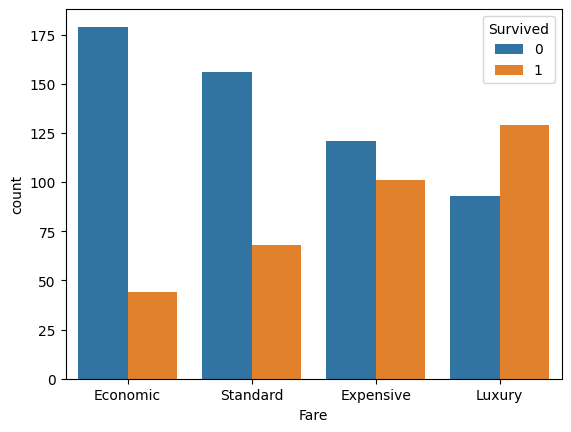

In [35]:
#to name for 0-25% quartile, 25-50, 50-75, 75-100
fare_categories = ['Economic', 'Standard', 'Expensive', 'Luxury']
quartile_data = pd.qcut(train_df['Fare'],4, labels= fare_categories)
sns.countplot(data= train_df, x=quartile_data, hue="Survived")

In [27]:
train_df.Fare

PassengerId
1       7.2500
2      71.2833
3       7.9250
4      53.1000
5       8.0500
        ...   
887    13.0000
888    30.0000
889    23.4500
890    30.0000
891     7.7500
Name: Fare, Length: 891, dtype: float64

## 4.Feature Engineering and Data Wrapping

In [38]:
train_df.Name.head(5)

PassengerId
1                              Braund, Mr. Owen Harris
2    Cumings, Mrs. John Bradley (Florence Briggs Th...
3                               Heikkinen, Miss. Laina
4         Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                             Allen, Mr. William Henry
Name: Name, dtype: object

In [46]:
import re #regular expression 
def extract_title(name):
    p = re.compile(r",(.+)\.")
    return(p.search(name)).groups(1)[0].strip()

train_df['Title']= train_df['Name'].apply(lambda name: extract_title(name))

In [47]:
train_df['Title'].value_counts()

Mr                          517
Miss                        182
Mrs                         124
Master                       40
Dr                            7
Rev                           6
Col                           2
Mlle                          2
Major                         2
Ms                            1
Mrs. Martin (Elizabeth L      1
Lady                          1
Sir                           1
Mme                           1
Don                           1
Capt                          1
the Countess                  1
Jonkheer                      1
Name: Title, dtype: int64

In [48]:
test_df['Title']= test_df['Name'].apply(lambda name: extract_title(name))

In [49]:
test_df['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

In [ ]:
sns.countplot()